# Cluster Results
### Multiple runs

In this notebook we show the results of the cluster estimations for different Copacabana runs.

### Importing Packages

In [1]:
from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import matplotlib
import numpy as np
import os

from collections import defaultdict
from matplotlib import pylab
import matplotlib.pyplot as plt

from scipy import stats
import sklearn

import scipy.stats as st
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
import sys
sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/')
from plotLibrary import viewClusters,box_plot, get_dataFrame_residual

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Loading Data

In [4]:
# ## the run we take a look into is:
# pz_labels = ['gauss001','gauss003','gauss005',None,'dnf_model']
# runs= ['%s-r200-m0'%li for li in pz_labels[:-2]]
# runs+= ['dnf-r200-m0','dnf003-r200-m0']
# #runs= [run1,run2,run3,run4]

In [30]:
# ## the run we take a look into is:
# pz_labels = ['gauss001','gauss003','gauss005',None,'dnf_model']
# runs= ['%s-rhod-m0'%li for li in pz_labels[:-2]]
# runs+= ['dnf-rhod-m0','dnf003-rhod-m0']
# #runs= [run1,run2,run3,run4]

In [31]:
runs=['gauss001_rhod_02Lstar_raper100','gauss003_rhod_02Lstar_raper100','gauss005_rhod_02Lstar_raper100']


In [32]:
# runs=['gauss001_r200_02Lstar','gauss003_r200_02Lstar_nfw','gauss005_r200_02Lstar_nfw','dnf_r200_02Lstar_nfw']

In [33]:
# pz_files = ['gauss003']
# z_widths = [0.03]
# r_apers  = [0.50, 0.75, 1.0, 1.25]
# # runs = ['{}_{}_{}_raper{:02d}'.format('gauss003','rhod','02Lstar',int(100*ri)) for ri in r_apers]

In [34]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
vc = viewClusters(cfg=root+'config_buzzard_v2.yaml')
for run in runs:
    print('run: %s'%run)
    vc.load_data(run)

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny

In [35]:
count=0
def save_figures(fig,count,is_tight=True,dpi=100):
    if is_tight: fig.tight_layout()
    fig.savefig('figures/fig_%i.pdf'%count,dpi=dpi,facecolor='w',transparent=False)

### Residuals and Metrics

In [36]:
for run in runs:
    vc.compute_residuals(run)

In [37]:
for run in runs:
    vc.eval_all_metrics(run)

In [38]:
heading_properties = [('font-size', '16px')]
cell_properties = [('font-size', '16px')]
dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

#df.style.set_table_styles(dfstyle)

### Summary Statistics for the whole sample

Here we compute some statiscial properties of the ratio $= x/x_{true}$ where x ={$N_{gals},\mu_{\star},R_{200}$}

In [39]:
stats_all = vc.show_metrics_table_all(runs[0])
print('Statistics for the whole sample')
stats_all.style.set_table_styles(dfstyle)

Statistics for the whole sample


,bias,outlier_frac,scatter_nmad,scatter_percentile,scatter_stdev
Ngals,-0.0957857,0.0411647,0.264277,0.325088,0.469583
MU,-0.143335,0.0577309,0.205252,0.263139,0.425337
R200,0.0260464,0.00100402,0.25598,0.274854,0.283858


In [40]:
stats_all = pd.concat([vc.show_metrics_table_all(run) for run in runs])
stats_all['run'] = np.repeat(runs,3)
stats_all = stats_all.sort_index()
stats_all['predictor'] = stats_all.index
stats_all = stats_all.set_index('run')

In [41]:
#stats_all

In [42]:
stats_all.iloc[np.where(stats_all.predictor=='MU')[0],[0,2,3]].style.set_table_styles(dfstyle)

,bias,scatter_nmad,scatter_percentile
run,,,
gauss001_rhod_02Lstar_raper100,-0.143335,0.205252,0.263139
gauss003_rhod_02Lstar_raper100,-0.173181,0.317423,0.384587
gauss005_rhod_02Lstar_raper100,-0.195939,0.380572,0.460798


In [43]:
stats_all.iloc[np.where(stats_all.predictor=='Ngals')[0],[0,2,3]].style.set_table_styles(dfstyle)

,bias,scatter_nmad,scatter_percentile
run,,,
gauss001_rhod_02Lstar_raper100,-0.0957857,0.264277,0.325088
gauss003_rhod_02Lstar_raper100,-0.0398809,0.388283,0.471691
gauss005_rhod_02Lstar_raper100,-0.00436005,0.472777,0.563153


In [44]:
stats_all.iloc[np.where(stats_all.predictor=='R200')[0],[0,2,3]].style.set_table_styles(dfstyle)

,bias,scatter_nmad,scatter_percentile
run,,,
gauss001_rhod_02Lstar_raper100,0.0260464,0.25598,0.274854
gauss003_rhod_02Lstar_raper100,0.00532674,0.291322,0.309341
gauss005_rhod_02Lstar_raper100,-0.0303539,0.3133,0.339439


In [45]:
for run in runs:
    print('run: %s'%run)
    ntrue = vc.models[run]['regressors']['Ngals_true']
    nobjs = np.count_nonzero(ntrue>0.)
    print('Nobj: %i'%nobjs)
    print('Frac: %.2f'%(1.*nobjs/ntrue.size))
    print('\n')

run: gauss001_rhod_02Lstar_raper100
Nobj: 1992
Frac: 1.00


run: gauss003_rhod_02Lstar_raper100
Nobj: 1992
Frac: 1.00


run: gauss005_rhod_02Lstar_raper100
Nobj: 1992
Frac: 1.00




### Residuals Distribution

Residuals

In [46]:
df = get_dataFrame_residual(vc,runs)

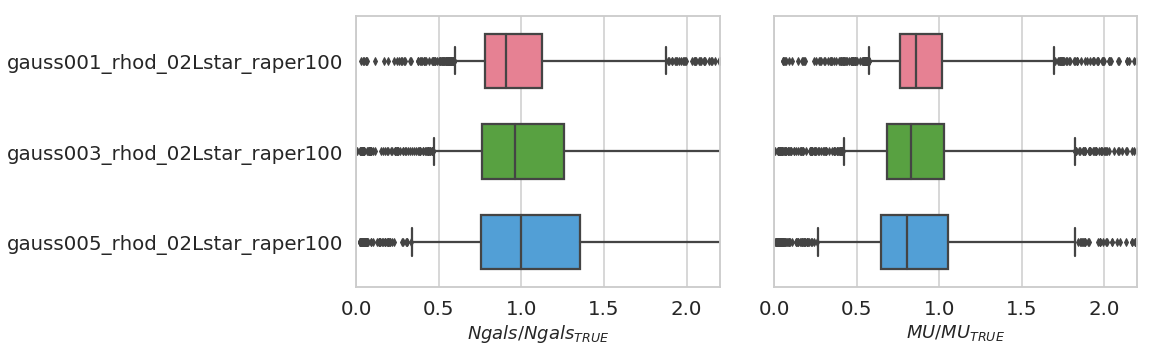

In [47]:
fig, axs = plt.subplots(1, 2, sharey='all', figsize=(14,5))
fig.subplots_adjust(hspace=0.25,wspace=0.15)

box_plot(df,'Ngals',ax=axs[0],xlims=(0.,2.2))
box_plot(df,'MU',ax=axs[1],xlims=(0.,2.2))

In [48]:
nruns=3

(0.0, 2.3)

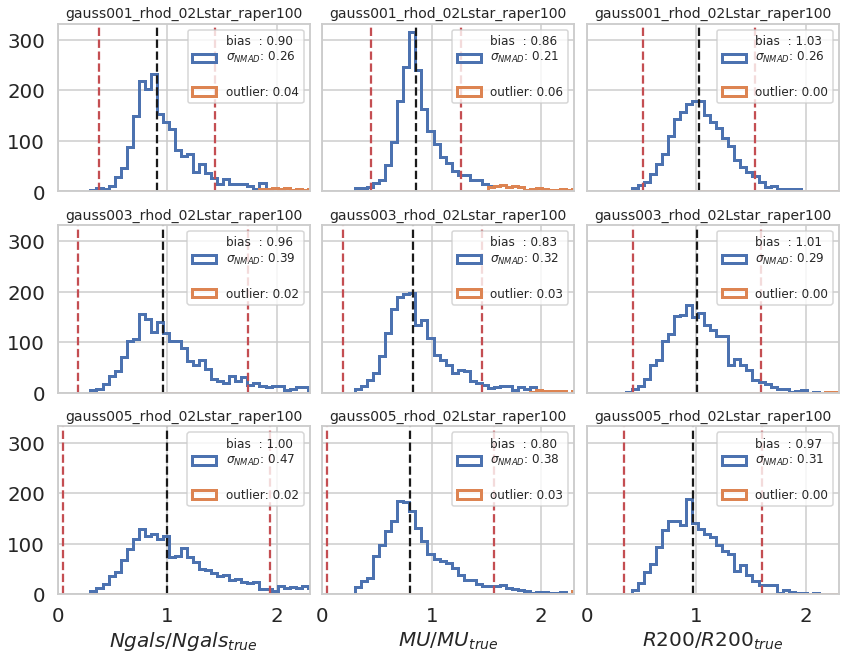

In [49]:
fig, axs = plt.subplots(nruns, 3, sharey='all',sharex='all', figsize=(14,(3.5)*nruns))
fig.subplots_adjust(hspace=0.20,wspace=0.05)

axs = axs.T
for j in range(3):
    for i in range(nruns):
        vc.plot_residual_distribution(runs[i],vc.predictors[j],axs=axs[j,i],log_residual=False,xlims=(0.3,3.))
        if i<(nruns-1):
            axs[j,i].set_xlabel('')
        
axs[0,0].set_xlim(0.,2.3)

Log Residual

(-0.4, 0.7)

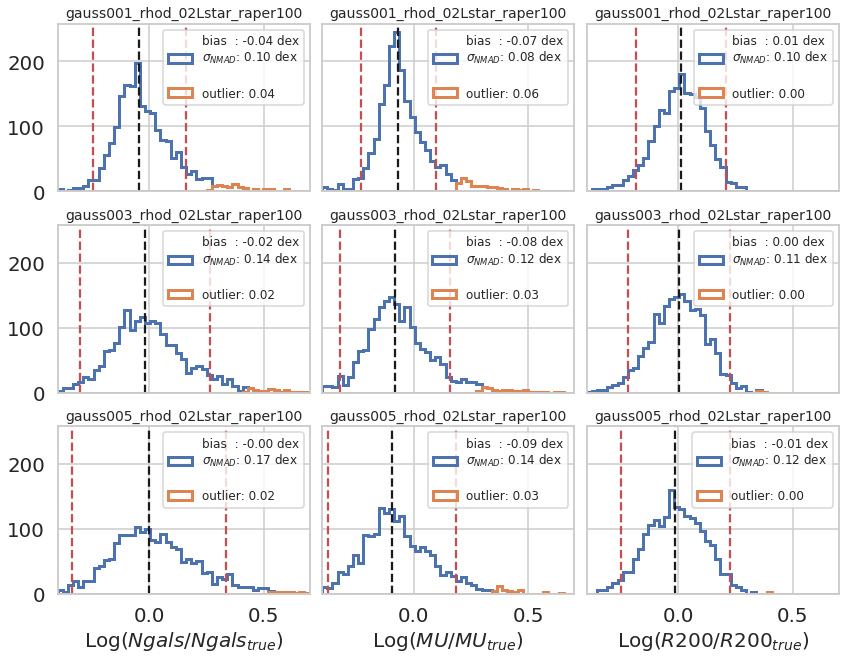

In [50]:
fig, axs = plt.subplots(nruns, 3, sharey='all',sharex='all', figsize=(14,(3.5)*nruns))
fig.subplots_adjust(hspace=0.20,wspace=0.05)

axs = axs.T
for j in range(3):
    for i in range(nruns):
        vc.plot_residual_distribution(runs[i],vc.predictors[j],axs=axs[j,i],log_residual=True,xlims=(-0.4,0.7))
        if i<(nruns-1):
            axs[j,i].set_xlabel('')
        
axs[0,0].set_xlim(-0.4,0.7)

In [51]:
10**0.11

1.288249551693134

### Binned Analysis

In [52]:
myperc = np.array([1.,15,30,45,60,75,90,95,97.5,100])
# myperc = np.array([1.,15,45,70,90,97.5,100])
mycols = ['Ngals_true','MU_TRUE','R200_true','redshift','M200_true']
mybins = []
for cols in mycols:
    mybins.append(np.nanpercentile(vc.models[runs[0]]['aux_vars'][cols],myperc))

In [53]:
mybins[0] = np.logspace(np.log10(1.5),np.log10(mybins[0][-1]),mybins[1].size)
mybins[1] = np.logspace(np.log10(mybins[1][0]),np.log10(mybins[1][-1]),mybins[1].size)
# mybins[-2] = np.linspace(0.1,0.7,9)

In [54]:
mybins[0]

array([  1.5       ,   2.6529515 ,   4.69210109,   8.29861108,
        14.67720846,  25.95861476,  45.91129724,  81.20029648,
       143.61363203, 254.        ])

In [55]:
vc.make_bins(runs,*mybins)
for run in runs:
    vc.compute_bin_statstics(run)
    vc.eval_all_metrics(run,binned=True)

In [56]:
x = np.arange(len(runs))
colors = np.array([sns.color_palette("hls",5)[xx] for xx in x])

In [57]:
# fmts = ['o','d','h','P']
fmts = ['o','*','d','h','s']

In [58]:
runs

['gauss001_rhod_02Lstar_raper100',
 'gauss003_rhod_02Lstar_raper100',
 'gauss005_rhod_02Lstar_raper100']

In [59]:
label_runs = {runs[0]:r'$\sigma_z = 0.01$',
              runs[1]:r'$\sigma_z = 0.03$',
              runs[2]:r'$\sigma_z = 0.05$'}#},
#               runs[3]:r'DNF: $\sigma_z \sim 0.035$'}

# label_runs = {runs[i]:r'$R = %.2f \times R_{200}$'%ri for i,ri in enumerate(r_apers)}

In [60]:
# colors_purple = ["#A85CF9",'#5534A5','#4B7BE5','#6FDFDF']
# colors_purple = ["#180A0A",'#5534A5','#4B7BE5','#6FDFDF']
color_grey = ["#F73D93",'#413F42','#4B7BE5','#7F8487']
color_pink = ['#F582A7','#F10086',"#711A75",'#180A0A']
color_pink = ['#F582A7','#F10086',"#711A75",'#180A0A']

In [61]:
colors = color_pink

In [62]:
label_runs

{'gauss001_rhod_02Lstar_raper100': '$\\sigma_z = 0.01$',
 'gauss003_rhod_02Lstar_raper100': '$\\sigma_z = 0.03$',
 'gauss005_rhod_02Lstar_raper100': '$\\sigma_z = 0.05$'}

# Figure 0 - Sample Selection

In [38]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana
cfg = root+'config_buzzard_v2.yaml'
copa = copacabana(cfg,dataset='buzzard_v2')

cat = copa.load_copa_out('cluster',runs[0])

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny

In [39]:
def plot_scatter_hist(x, y, text=None, color='b',figsize=(10,8),
                      xlabel=r'$z$',ylabel=r'$\log(M_{200,c})\,\,[M_{\odot}\; h^{-1}]$'):
    fig = plt.figure(figsize=figsize)

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.01
    scale = 70
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.175, height]

    scatter_axes = plt.axes(rect_scatter)
    scatter_axes.tick_params(direction='in', top=True, right=True)
    x_hist_axes = plt.axes(rect_histx,sharex=scatter_axes)
    x_hist_axes.tick_params(direction='in')
    y_hist_axes = plt.axes(rect_histy,sharey=scatter_axes)
    y_hist_axes.tick_params(direction='in')
    
    xmax = np.nanmax(x)
    ymin, ymax = np.nanmin(y), np.nanmax(y)
    
    binx = np.linspace(0.1, xmax, num=15)
    biny = np.linspace(ymin, ymax, num=15)  # 1500/100.

    pal = sns.dark_palette("#3498db", as_cmap=True)
    # sns.kdeplot(x, y, ax=scatter_axes, cmap=pal, zorder=3)  # n_levels=10

    scatter_axes.set_xlabel(xlabel, fontsize=25)
    scatter_axes.set_ylabel(ylabel, fontsize=25)

    scatter_axes.scatter(x, y, s=scale, color=color, marker='o', alpha=0.3, zorder=0)
    if text is not None:
        scatter_axes.text(0.505, 15.05, text, color='gray', size=24)
#     scatter_axes.axhline(np.mean(y),linestyle='--',color='b')

    x_hist_axes.hist(x, bins=binx, density=False, alpha=0.3, color=color)
    y_hist_axes.hist(y, bins=biny, density=False, orientation='horizontal', alpha=0.3, color=color)
#     y_hist_axes.axhline(np.mean(y),linestyle='--', color='b')
    
    x_hist_axes.set_yticklabels([])
    y_hist_axes.set_xticklabels([])

    if ymax<0:
        ymin,ymax=13.5,15.3

        scatter_axes.set_ylim(ymin, ymax)
        y_hist_axes.set_ylim(ymin, ymax)

    scatter_axes.xaxis.set_tick_params(labelsize=15)
    scatter_axes.yaxis.set_tick_params(labelsize=15)
    x_hist_axes.xaxis.set_tick_params(labelsize=0.05, labelcolor='white')
    y_hist_axes.yaxis.set_tick_params(labelsize=0.05, labelcolor='white')

    fig.subplots_adjust(hspace=.01, wspace=0.01)
    return fig

In [40]:
zcls = np.array(cat['redshift'])
log_m200 = np.log10(np.array(cat['M200_true']))


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


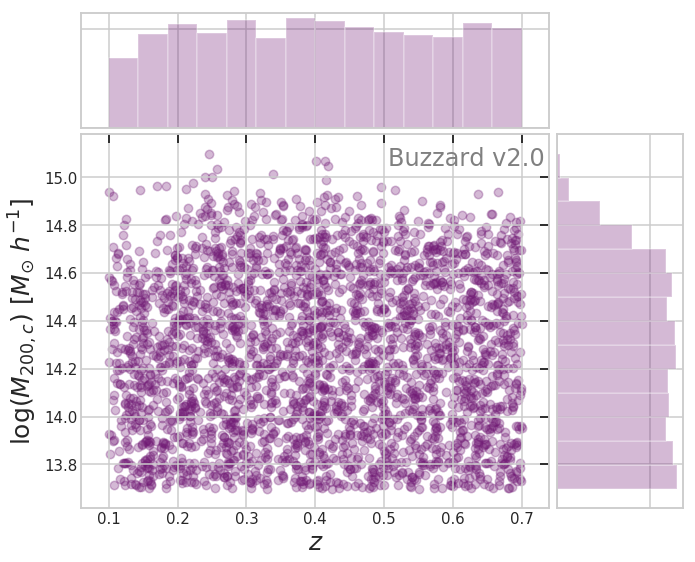

In [41]:
# from plotLibrary import plot_scatter_hist

fig = plot_scatter_hist(zcls, log_m200, text='Buzzard v2.0', color=color_pink[2])
save_figures(fig,33,is_tight=True)

## Figure 1 - Mu-Star True

In [324]:
def set_bands(perc, bias=0., xlims=(10, 1e4), ax=None, **kwargs):
    if ax is None: ax = plt.gca()
    xvec = np.linspace(xlims[0],xlims[1],100)
    scale = np.sqrt(2e3/xvec)
    #lower, upper = (-(perc)*scale-bias), ((perc)*scale-bias)
    lower, upper = (-perc*scale-bias), (perc*scale-bias)
    yl, yp = (10**lower)*xvec, (10**upper)*xvec
    #yl, yp = 10**(lower)*xvec, 10**(upper)*xvec
    ax.fill_between(xvec, yl, yp, **kwargs)
    #plt.plot(xvec,xvec*10**(-bias),color='gray')

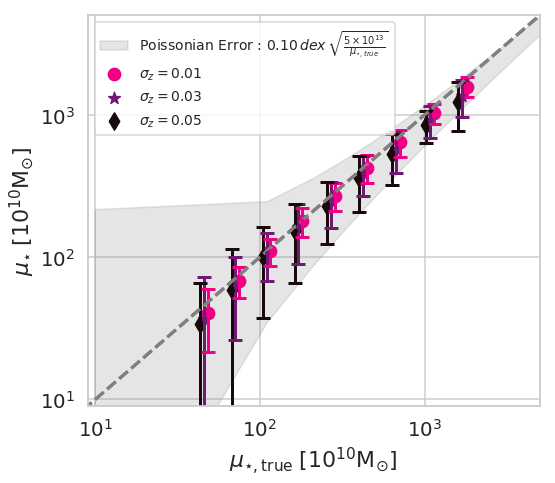

In [373]:
fig, axs = plt.subplots(1, 1, figsize=(8,7))
# fig.subplots_adjust(hspace=0.30,wspace=0.1)
sigma_label = r'Poissonian Error '
sigma_label += ': $ 0.10 \, dex\,  \\sqrt{\\frac{5 \\times 10^{13}}{\\mu_{\\star,true}}} $ '
i = 0
set_bands(0.10,bias=0.08,color='gray',alpha=0.2,ax=axs,label=sigma_label)
for co,run,fi in zip(colors[1:],runs,fmts):
    if i>=0:
        vc.plot_scaling_relation(vc.regressors[1],vc.predictors[1],run,
                                 offset=1-i*0.05,xlims=(1.,5e3),
                                 points=False,axs=axs,color=co,
                                 label=label_runs[run],fmt=fi)
        axs.legend(fontsize=14)
    i += 1

axs.set_xlim(9.,)
axs.set_ylim(9.,)
save_figures(fig,0,is_tight=True)
count+=1

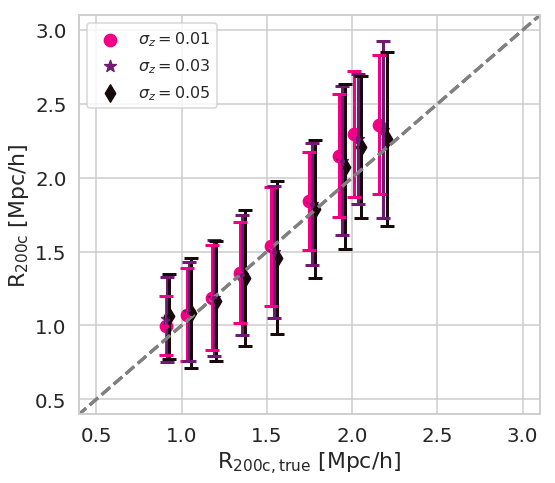

In [333]:
fig, axs = plt.subplots(1, 1, figsize=(8,7))
# fig.subplots_adjust(hspace=0.30,wspace=0.1)

i = 0
# set_bands(0.30,bias=-0.1,xlims=(0.1,3.1),color='gray',alpha=0.2,ax=axs,label=r'r.m.s.$(x)=30 \%$')
for co,run,fi in zip(colors[1:],runs,fmts):
    vc.plot_scaling_relation(vc.regressors[2],vc.predictors[2],run,xlims=(0.25,3.15),
                             points=False,axs=axs,color=co,offset=1+i*0.01,
                             label=label_runs[run],fmt=fi,log_scale=False)
    axs.legend(fontsize=16)
    i += 1

axs.set_xlim(0.4,3.1)
axs.set_ylim(0.4,3.1)
save_figures(fig,1,is_tight=True)
count+=1

In [46]:
# !rm mu_precision_photoz.npy

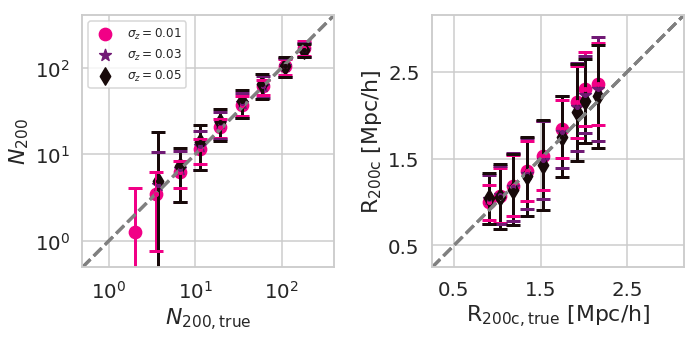

In [47]:
offset = 1.0
fig, axs = plt.subplots(1, 2, figsize=(10,4+offset))
fig.subplots_adjust(hspace=0.30,wspace=0.1)
i=0
for co,run,fi in zip(colors[1:],runs,fmts):
    vc.plot_scaling_relation(vc.regressors[0],vc.predictors[0],run,xlims=(0.5,400.),
                             points=False,axs=axs[0],offset=1+i*0.00,color=co,
                             label=label_runs[run],fmt=fi)
    
#     vc.plot_scaling_relation(vc.regressors[1],vc.predictors[1],run,xlims=None,
#                              points=False,axs=axs[0],color=co,offset=1+i*0.00,
#                              label=label_runs[run],fmt=fi)
    
    vc.plot_scaling_relation(vc.regressors[2],vc.predictors[2],run,xlims=(0.25,3.15),
                             points=False,axs=axs[1],color=co,offset=1+i*0.00,
                             label=label_runs[run],fmt=fi,log_scale=False)

    i+=1
# axs[0].set_xlim(1.2,)
# axs[0].set_ylim(1.2,)
# axs[1].set_xlim(0.,3.0)
# axs[1].set_ylim(0.,3.0)

axs[0].get_legend().remove()
# axs[1].get_legend().remove()
axs[1].get_legend().remove()

axs[0].legend(loc=2,
    fontsize=12,
    ncol=1)
fig.tight_layout()

axs[1].set_yticks(np.arange(0.5,3.+0.5,1.))
axs[1].set_xticks(np.arange(0.5,3.+0.5,1.))
# axs[1].set_title('Test',color='w',fontsize=32)
# axs[1].legend(
#     loc='upper center', 
#     fontsize=12,
#     bbox_to_anchor=(0.5, 1.15),
#     ncol=len(runs))

# save_figures(fig,1,is_tight=False)
# count+=1

In [48]:
pz_files = ['gauss001','gauss003','gauss005']
z_widths = [0.01,0.03,0.05]
r_apers  = [0.50, 0.75, 1.0]
runs_all = []
for zfile in pz_files:
    runs_all += ['{}_{}_{}_raper{:02d}'.format(zfile,'rhod','02Lstar',int(100*ri)) for ri in r_apers]
runs_all

['gauss001_rhod_02Lstar_raper50',
 'gauss001_rhod_02Lstar_raper75',
 'gauss001_rhod_02Lstar_raper100',
 'gauss003_rhod_02Lstar_raper50',
 'gauss003_rhod_02Lstar_raper75',
 'gauss003_rhod_02Lstar_raper100',
 'gauss005_rhod_02Lstar_raper50',
 'gauss005_rhod_02Lstar_raper75',
 'gauss005_rhod_02Lstar_raper100']

In [49]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
vc = viewClusters(cfg=root+'config_buzzard_v2.yaml')
for run in runs_all:
    print('run: %s'%run)
    vc.load_data(run)

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny

In [50]:
df = get_dataFrame_residual(vc,runs_all,label='log_residual')

In [51]:
# df

In [61]:
# from statsmodels import robust
nBoot = 100
data = []
for zfile in pz_files:
    runsi = ['{}_{}_{}_raper{:02d}'.format(zfile,'rhod','02Lstar',int(100*ri)) for ri in r_apers]
    df = get_dataFrame_residual(vc,runsi,label='residual')
    means,stds = [], []
    for i in range(nBoot):
        idx = np.random.uniform(len(df),size=len(df))
        stds.append(df.iloc[idx].groupby('runs').MU.mad().to_numpy())
        means.append(df.iloc[idx].groupby('runs').MU.median().index.to_numpy())
    
    scatter = np.median(np.log10(1/(1-np.array(stds))),0)
    scatter_err = np.std(np.log10(1/(1-np.array(stds))),0)
    data.append([scatter,scatter_err])

data = np.array(data)
xdict1 = {runsi[i]:ri for i,ri in enumerate(r_apers)}
xvariables = np.array([xdict1[li] for li in means[0]])

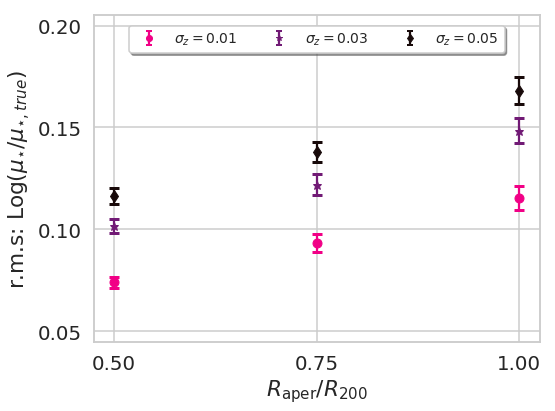

In [65]:
fig, axs = plt.subplots(1, 1, figsize=(8,8*3/4))

for i in range(len(pz_files)):
    axs.errorbar(xvariables, data[i,0,:], yerr=data[i,1,:],
                 fmt=fmts[i],ls=None,capsize=5, capthick=3, color=colors[i+1])
    axs.errorbar(xvariables, -1.*data[i,0,:], yerr=data[i,1,:],
                 fmt=fmts[i], markersize=6, ls=None, capsize=3, capthick=2, color=colors[i+1], label=label_runs[runs[i]])

    
lgnd = axs.legend(fontsize=14,numpoints=1,loc='upper center', bbox_to_anchor=(0.5, 0.99),
          ncol=3, fancybox=True, shadow=True)

axs.set_xlabel(r'$R_{\rm aper}/R_{200}$')
# axs[0].set_xlabel('photo-z accuracy: $\sigma_{z,0}$')
axs.set_ylabel('r.m.s: Log$(\mu_{\star}/\mu_{\star,true})$')
_ = axs.set_xticks(np.linspace(0.5,1.0,3))
axs.set_ylim(0.045,0.205)
# axs[0].set_ylim([0.09,0.26])
axs.set_yticks([0.05, 0.10, 0.15, 0.20])

# axs[1].legend()
# axs[0].set_title(r'Fixed Aperture: $0.5 \times R_{200}$')
# axs.set_title(r'Different Apertures')
# axs[0].set_yticks([0.10,0.15,0.20,0.25])

save_figures(fig,5,is_tight=True)

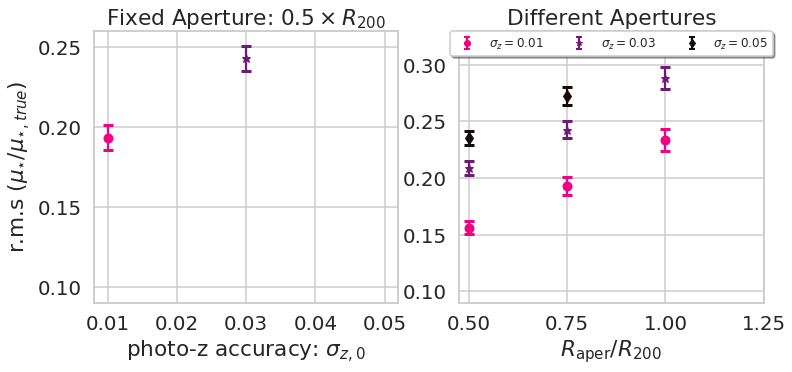

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

for i in range(len(pz_files)):
    axs[0].errorbar(z_widths[i], data[i,0,2], yerr=data[i,1,2],
                 fmt=fmts[i],ls=None,capsize=5, capthick=3, color=colors[i+1], label=label_runs[runs[i]])
    
for i in range(len(pz_files)):
    axs[1].errorbar(xvariables, data[i,0,:], yerr=data[i,1,:],
                 fmt=fmts[i],ls=None,capsize=5, capthick=3, color=colors[i+1])
    axs[1].errorbar(xvariables, -1.*data[i,0,:], yerr=data[i,1,:],
                 fmt=fmts[i], markersize=6, ls=None, capsize=3, capthick=2, color=colors[i+1], label=label_runs[runs[i]])

lgnd = axs[1].legend(fontsize=12,numpoints=1,loc='upper center', bbox_to_anchor=(0.5, 1.02),
          ncol=3, fancybox=True, shadow=True)

axs[1].set_xlabel(r'$R_{\rm aper}/R_{200}$')
axs[0].set_xlabel('photo-z accuracy: $\sigma_{z,0}$')
axs[0].set_ylabel('r.m.s ($\mu_{\star}/\mu_{\star,true}$)')
_ = axs[1].set_xticks(np.linspace(0.5,1.25,4))
axs[1].set_ylim([0.09,0.33])
axs[0].set_ylim([0.09,0.26])
# axs[1].set_yticks([0.10,0.15,0.20,0.25,0.30+.2])

# axs[1].legend()
axs[0].set_title(r'Fixed Aperture: $0.5 \times R_{200}$')
axs[1].set_title(r'Different Apertures')
_ = axs[0].set_yticks([0.10,0.15,0.20,0.25])

# save_figures(fig,5,is_tight=True)

In [117]:
if not os.path.isfile('mu_precision_photoz.npy'):
    nBoot = 1000
    means,stds = [], []
    for i in range(nBoot):
        idx = np.random.uniform(len(df),size=len(df))
        stds.append(df.iloc[idx].groupby('runs').MU.apply(robust.mad).to_numpy())
        means.append(df.iloc[idx].groupby('runs').MU.median().index.to_numpy())

    # stdsM = df.groupby('runs').MU.apply(robust.mad)
    xdict1 = {runs[i]:ri for i,ri in enumerate([0.01,0.03,0.05])}
    xvariables = np.array([xdict1[li] for li in means[0]])
    ix = np.argsort(xvariables)
    xvariables = np.tile(xvariables,(nBoot,1))

    np.save('mu_precision_photoz.npy',np.stack([xvariables[:,ix],np.array(stds)[:,ix]]))
else:
    outs = np.load('mu_precision_photoz.npy')
    xvariables = outs[0]
    stds = outs[1]

# np.save('mu_precision_raper.npy',np.array(stds))

In [118]:
if not os.path.isfile('mu_precision_raper_rerun.npy'):
    nBoot = 1000
    means,stds = [], []
    for i in range(nBoot):
        idx = np.random.uniform(len(df),size=len(df))
        stds.append(df.iloc[idx].groupby('runs').MU.apply(robust.mad).to_numpy())
        means.append(df.iloc[idx].groupby('runs').MU.median().index.to_numpy())

    # stdsM = df.groupby('runs').MU.apply(robust.mad)
    xdict1 = {runs[i]:ri for i,ri in enumerate([0.5,0.75,1.0,1.25])}
    xvariables = np.array([xdict1[li] for li in means[0]])
    ix = np.argsort(xvariables)
    xvariables = np.tile(xvariables,(nBoot,1))

    np.save('mu_precision_raper_rerun.npy',np.stack([xvariables[:,ix],np.array(stds)[:,ix]]))
else:
    outs = np.load('mu_precision_raper_rerun.npy')
    xvariable2 = outs[0]
    stds2 = outs[1]

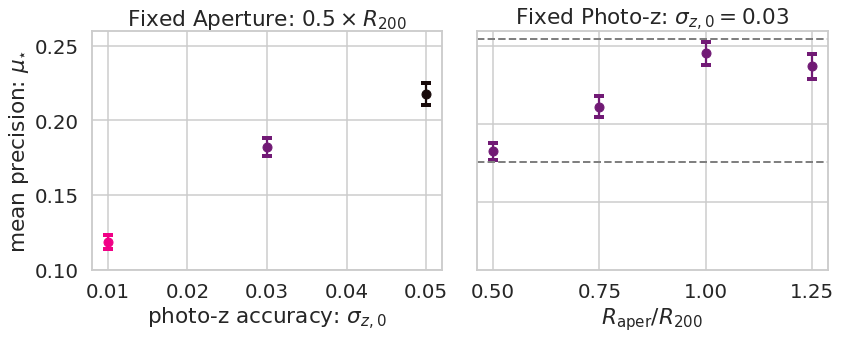

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey='all')

scatter = np.median(np.array(stds),0)
scatter_err = np.std(np.array(stds),0)

scatter2 = np.median(np.array(stds2),0)
scatter_err2 = np.std(np.array(stds2),0)

for i in range(len(xvariables[0])):
    axs[0].errorbar(xvariables[0][i], scatter[i], yerr=scatter_err[i],
                 fmt='o',ls=None,capsize=5, capthick=4, color=colors[i+1])
#     axs[0].axhline(scatter2[0]-scatter_err2[0],color='gray',ls='--',lw=2)
#     axs[0].axhline(scatter2[-2]+scatter_err2[-2],color='gray',ls='--',lw=2)
    
axs[1].errorbar(xvariable2[0], scatter2, yerr=scatter_err2,
             fmt='o',ls=None,capsize=5, capthick=4, color=colors[2],label=r'$\sigma_{z,0}=0.03$')
axs[1].axhline(scatter2[0]-scatter_err2[0]-0.0015,color='gray',ls='--',lw=2)
axs[1].axhline(scatter2[-2]+scatter_err2[-2]+0.0015,color='gray',ls='--',lw=2)
    
axs[1].set_xlabel(r'$R_{\rm aper}/R_{200}$')
axs[0].set_xlabel('photo-z accuracy: $\sigma_{z,0}$')
axs[0].set_ylabel('mean precision: $\mu_{\star}$')
_ = axs[1].set_xticks(np.linspace(0.5,1.25,4))
# axs[1].legend()
axs[0].set_title(r'Fixed Aperture: $0.5 \times R_{200}$')
axs[1].set_title(r'Fixed Photo-z: $\sigma_{z,0}=0.03$')
axs[0].set_yticks([0.10,0.15,0.20,0.25])
save_figures(fig,5,is_tight=True)

In [49]:
import sys
sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/selectionEffect/')

from fit_mor_evolution import mass_observable_relation, load_mor_results, save_mor_results

In [50]:
def re_size(x,Mp=10.**15.5):
    return np.log10(Mp*10**x*0.7)

def plot_line(x,y,ym,yp,color=None,ax=None,label="",ls='-',lw=1, fill=True):
    if ax is None: ax = plt.axes()
        
    #ax.plot(x, y, lw=6, color='k', label="")
    p = ax.plot(x, y, color=color, label=label, ls=ls, lw=lw)
    color = p[0].get_color()
    if fill:
        ax.fill_between(x,ym,yp, lw=3, color=color, alpha = 0.4)
    return color
    
def plot_output(self,name,var,is_log=True,ax=None,label=None,color=None,show_data=True,show_kllr=True):
    if ax is None: ax = plt.axes()
    if label is None: label=name
    try:
        linmix = self.data[name]['linmix']        
        color  = plot_line(re_size(linmix['x']),linmix[var],linmix[var+'-'],linmix[var+'+'],
                           ax=ax,label='',ls='--',lw=3,color=color)
    except:
        print('Run Linmix!')
    if show_kllr:
        kllr   = self.data[name]['kllr']
        _      = plot_line(re_size(kllr['x']),kllr[var],kllr[var+'-'],kllr[var+'+']
                          ,ax=ax,label=label,color=color)
        
    if (show_data) & (var=='y'):
        x,y,_,_ = self.get_variable(name,is_log=is_log)
        ax.scatter(re_size(x),y, s=30, alpha=0.1, color=color, label="")
        
    return ax

In [51]:
import pickle
def load_mor_results(key,root='/data/des61.a/data/johnny/Buzzard/mor_data/'):
    fname = root+'/%s.obj'%key
    filehandler = open(fname, 'r') 
    p2 = pickle.load(filehandler)
    filehandler.close()
    return p2


In [52]:
mor = load_mor_results('all_mLimited')

In [53]:
mor_relation_label = r'$\langle log_{10} \mu_{\star} | M_{200} \rangle  = \alpha+\beta \; log_{10} (M_{200})$' 
xlabel = r'$log_{10}\left( M_{200} \right) $'
ylabel = r'$log_{10}\left( \mu_{\star}/M_{\odot} \right)$'

labels = [xlabel,ylabel]

NameError: name 'mor' is not defined

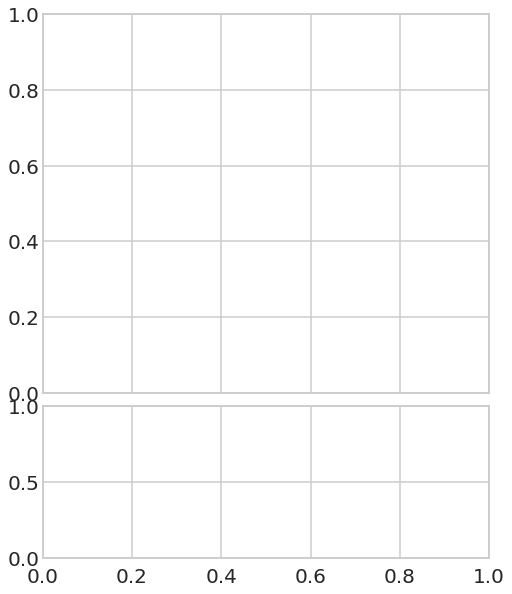

In [54]:
#Generate figure if none provided
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex = True,
                       gridspec_kw = {'height_ratios':[2.5, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

plot_output(mor,'copacabana', 'y', show_data=True, ax = ax[0], color=colors[2])
plot_output(mor,'copacabana', 'slope'  , show_data=False, ax = ax[1], color=colors[2])
# plot_output(mor,'observed', 'scatter', show_data=True , ax = ax[2], color='r')

plot_output(mor,'true', 'y', show_data=True, ax = ax[0], color=colors[-1])
plot_output(mor,'true', 'slope'  , show_data=False, ax = ax[1], color=colors[-1])
# plot_output(mor,'true', 'scatter', show_data=True , ax = ax[2], color='b')


ax[0].legend()

ax[0].set_ylabel(labels[1],fontsize=24)
ax[1].set_ylabel(r"$\beta$",fontsize=24)
ax[1].set_xlabel(labels[0],fontsize=24)

ax[0].set_title(mor_relation_label,fontsize=24)
# save_figures(fig,2,is_tight=True)
# count+=1

### MOR - For each aperture

In [ ]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana
cfg = root+'config_buzzard_v2.yaml'
copa = copacabana(cfg,dataset='buzzard_v2')

In [ ]:
catalogs = []

for run in runs:
    print('run: %s'%run)
    cat = copa.load_copa_out('cluster',run)

    mask = (cat['redshift']<0.65)&(cat['MU']>10.)&(cat['Ngals_true']>1.)

    print('masked fraction: %.2f'%(1.*np.count_nonzero(mask)/len(cat)))
    catalogs.append(cat[mask])

In [ ]:
def get_mustar_log(x):
    x = np.where(x<1,1,x)
    return x
## Pivot points

Mp = 10.**15.5#np.nanmedian(cat['M200_true'])
Mup= 1./10**10#np.nanmedian(cat['MU'])

print('Pivot Points')
print(r'M200: %.2e $M_{\odot}$'%Mp)
print(r'$\mu_{\star}: %.2e M_{\odot}$'%(Mup*1.0e10))

In [ ]:
datas  = defaultdict(dict)
for run,cat in zip(runs,catalogs):
    zcls = np.array(cat['redshift'])
    m200 = np.array(cat['M200_true']/Mp)

    mu    = get_mustar_log(cat['MU']/Mup)
    muerr = get_mustar_log(cat['MU_ERR_JK']/Mup)

    mut   = get_mustar_log(cat['MU_TRUE']/Mup)
    muterr= get_mustar_log(cat['MU_TRUE_ERR_JK']/Mup)

    ng    = np.array(cat['Ngals_flat'])
    ngt   = np.array(cat['Ngals_true'])
    
    datas[run]['x'] = m200
    datas[run]['z'] = zcls
    
    datas[run]['y1']= mu
    datas[run]['y2']= mut
    datas[run]['y1err'] = muerr
    datas[run]['y2err'] = muterr

    datas[run]['y3'] = ng
    datas[run]['y4'] = ngt        

In [88]:
mass = np.log10(np.array(datas[run]['x']))
massBins = np.linspace(np.nanmin(mass), np.nanmax(mass), 4)
binWidth = np.diff(massBins)[0]#/2.
Mp*10**massBins

array([5.00199955e+13, 1.46551173e+14, 4.29373217e+14, 1.25799989e+15])

In [89]:
np.histogram(mass,bins=massBins)

(array([892, 958, 379]),
 array([-1.80085635, -1.3340107 , -0.86716505, -0.4003194 ]))

In [90]:
binWidth

0.4668456514676411

In [99]:
zcls = datas[run]['z']
zbins = np.linspace(0.1,0.65,7)
np.histogram(zcls,bins=zbins)

(array([304, 400, 364, 418, 382, 361]),
 array([0.1       , 0.19166667, 0.28333333, 0.375     , 0.46666667,
        0.55833333, 0.65      ]))

In [91]:
from time import time

In [92]:
## fiting
mor_all = mass_observable_relation()

for run in runs:
    print('run: %s'%run)
    t0 = time()
    mor_all.add_dataset(run,datas[run]['x'],datas[run]['y1'])
    mor_all.fit_kllr(run, is_log=True, bins=massBins, nbins=None, kernel_width=binWidth)
    
    #mor_all.fit_linmix(run,is_log=True,nbins=11,nchains=12)
    partial_time = (time()-t0)/60.
    print('Partial time %.2f min'%partial_time)

    print('\n')

Welcome Mass-Observable Relation Fit
run: gauss001_rhod_02Lstar_raper50


100%|██████████| 4/4 [00:00<00:00, 13.26it/s]


Save Results
see me
('kllr keys:', ['slope', 'slope-', 'y+', 'y-2', 'y-', 'intercept+', 'intercept-', 'scatter-', 'slope+', 'scatter+', 'y+2', 'intercept', 'scatter2', 'intercept2', 'y', 'x', 'slope2', 'scatter'])
Partial time 0.01 min


run: gauss003_rhod_02Lstar_raper50


100%|██████████| 4/4 [00:00<00:00, 13.83it/s]


Save Results
see me
('kllr keys:', ['slope', 'slope-', 'y+', 'y-2', 'y-', 'intercept+', 'intercept-', 'scatter-', 'slope+', 'scatter+', 'y+2', 'intercept', 'scatter2', 'intercept2', 'y', 'x', 'slope2', 'scatter'])
Partial time 0.01 min


run: gauss005_rhod_02Lstar_raper50


100%|██████████| 4/4 [00:00<00:00, 13.63it/s]

Save Results
see me
('kllr keys:', ['slope', 'slope-', 'y+', 'y-2', 'y-', 'intercept+', 'intercept-', 'scatter-', 'slope+', 'scatter+', 'y+2', 'intercept', 'scatter2', 'intercept2', 'y', 'x', 'slope2', 'scatter'])
Partial time 0.01 min




In [93]:
mor_all.data[run]

{'delta': array([ True,  True,  True, ...,  True,  True,  True]),
 'kllr': {'intercept': array([12.76598757, 12.92689177, 13.08090026, 13.20354442]),
  'intercept+': array([12.79577816, 12.96240102, 13.10518573, 13.23720031]),
  'intercept-': array([12.73645248, 12.90275197, 13.05161652, 13.16144226]),
  'intercept2': array([12.82995364, 12.98181907, 13.123506  , 13.27586761]),
  'scatter': array([0.28881037, 0.29514579, 0.30458632, 0.31096371]),
  'scatter+': array([0.29372543, 0.29896323, 0.30994903, 0.31720586]),
  'scatter-': array([0.28315134, 0.28999834, 0.29712652, 0.30397488]),
  'scatter2': array([0.29739002, 0.30217535, 0.31463734, 0.32459356]),
  'slope': array([0.670021  , 0.78708008, 0.91432069, 1.03685955]),
  'slope+': array([0.68995732, 0.81344901, 0.93763432, 1.07056137]),
  'slope-': array([0.64862829, 0.76907916, 0.89353608, 0.9980085 ]),
  'slope2': array([0.71522822, 0.82878671, 0.94846524, 1.09642804]),
  'x': array([-1.80085635, -1.3340107 , -0.86716505, -0.40031

In [94]:
# save_mor_results('mor_raper_variation_gauss003',mor_all)

In [95]:
# mor_all2 = mor_all
# mor_all = load_mor_results('mor_uniform_pz_and_raper_variation')

In [96]:
# mor_all.data[runs_all[2]]['linmix']

In [97]:
runs

['gauss001_rhod_02Lstar_raper50',
 'gauss003_rhod_02Lstar_raper50',
 'gauss005_rhod_02Lstar_raper50']

Run Linmix!
Run Linmix!
Run Linmix!
Run Linmix!
Run Linmix!
Run Linmix!


Text(0.5,0,'$log_{10}\\left( M_{200} \\right) $')

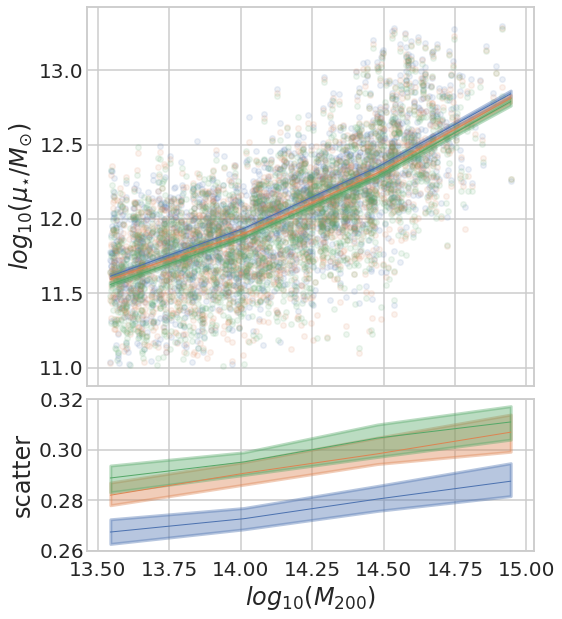

In [98]:
#Generate figure if none provided
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex = True,
                       gridspec_kw = {'height_ratios':[2.5, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

for i,run in enumerate(runs):
    #plot_output(mor_all, run, 'y', color=colors[i], label=label_runs[run], show_data=True ,ax = ax[0])
    #plot_output(mor_all, run, 'slope'  ,color=colors[i], show_data=False, ax = ax[1], show_kllr=True)
    plot_output(mor_all, run, 'y', label=run, show_data=True ,ax = ax[0])
    #plot_output(mor_all, run, 'slope', show_data=False, ax = ax[1], show_kllr=True)
    plot_output(mor_all, run, 'scatter', show_data=True , ax = ax[1], show_kllr=True)
    
    
    #plot_output(mor_all, run, 'scatter',color=colors[i], show_data=True , ax = ax[2], show_kllr=False)

# ax[0].legend()
ax[0].set_ylabel(labels[1],fontsize=24)
# ax[1].set_ylabel(r"$\beta$",fontsize=24)
ax[1].set_ylabel(r"scatter",fontsize=24)
ax[1].set_xlabel(labels[0],fontsize=24)


In [96]:
10**(-0.12)

0.7585775750291838

## Galaxy Membership 

In [188]:
import sys
sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/')
from plotLibrary import viewMembershipSelection


In [209]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
vm = viewMembershipSelection(cfg=root+'config_buzzard_v2.yaml',dataset='buzzard_v2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny

In [210]:
runs = ['gauss001_rhod_02Lstar_raper100','gauss003_rhod_02Lstar_raper100','gauss005_rhod_02Lstar_raper100']
runs+= ['gauss001_rhod_02Lstar_raper50','gauss003_rhod_02Lstar_raper50','gauss005_rhod_02Lstar_raper50']

In [211]:
for run in runs:
    print('run: %s'%run)
    vm.load_data(run,is_bma=False)

run: gauss001_rhod_02Lstar_raper100
run: gauss003_rhod_02Lstar_raper100
run: gauss005_rhod_02Lstar_raper100
run: gauss001_rhod_02Lstar_raper50
run: gauss003_rhod_02Lstar_raper50
run: gauss005_rhod_02Lstar_raper50


In [212]:
from sklearn.metrics import precision_recall_curve

for run in runs:    
    vm.compute_precision_recall_curves(run,prob='Pmem',th='True')

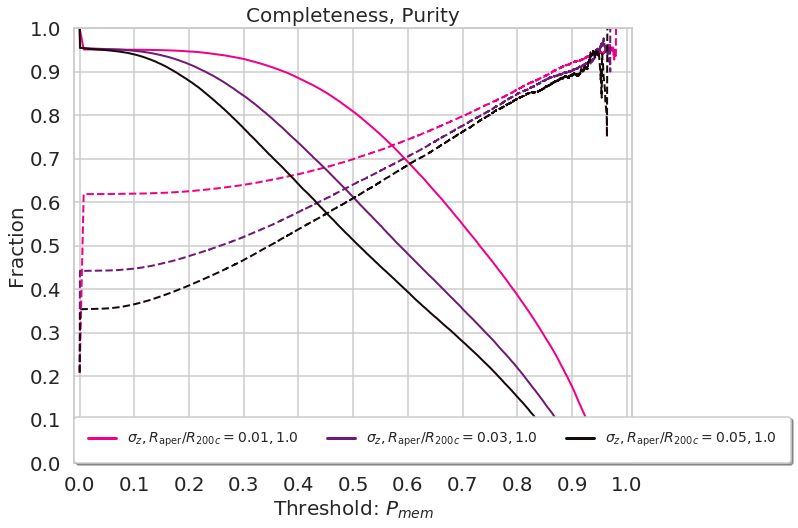

In [213]:
plt.figure(figsize=(10,8))

for color,run in zip(colors[1:],runs[:3]):
    plt.axvline(-1.,color=color,label=label_runs[run],lw=3)

plt.legend(fontsize=14, loc=3, shadow=True, borderaxespad=0.,ncol=int(len(runs)/2),borderpad=1)

for color,run in zip(colors[1:],runs):
    vm.plot_precision_recall_vs_threshold(run,c1=color)
    #plt.legend()
    
plt.xlabel(r'Threshold: $P_{mem}$', fontsize=20)
plt.ylabel('Fraction', fontsize=20)
plt.title('Completeness, Purity',fontsize=20)

save_figures(fig,98,is_tight=False)

In [239]:
# label_runs = {runs[0]:r'$\sigma_z, R_{\rm aper}/R_{200c} = 0.01, 1.0$',
#               runs[1]:r'$\sigma_z, R_{\rm aper}/R_{200c} = 0.03, 1.0$',
#               runs[2]:r'$\sigma_z, R_{\rm aper}/R_{200c} = 0.05, 1.0$',
#               runs[3]:r'$\sigma_z, R_{\rm aper}/R_{200c} = 0.01, 0.5$',
#               runs[4]:r'$\sigma_z, R_{\rm aper}/R_{200c} = 0.03, 0.5$',
#               runs[5]:r'$\sigma_z, R_{\rm aper}/R_{200c} = 0.05, 0.5$'
#              }
label_runs = {
              runs[0]:r'$\sigma_z =  0.01$',
              runs[1]:r'$\sigma_z =  0.03$',
              runs[2]:r'$\sigma_z =  0.05$'}

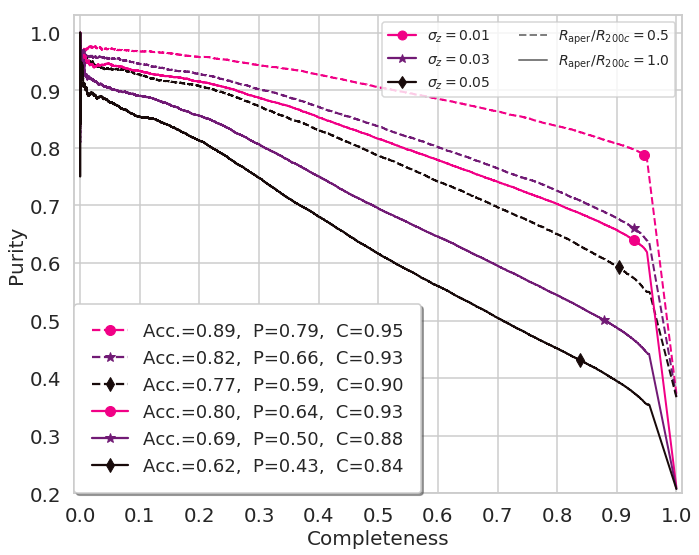

In [259]:
fig = plt.figure(figsize=(10, 8))

for color,run,fmt in zip(colors[1:],runs[3:],fmts):
    vm.plot_purity_completeness(run,label='',color=color,ls='--',optimal=False)
    vm._plot_optimal(run,'completeness','purity', ax=plt.gca(), color=color, ls='--', marker=fmt, markersize=10)

    
for color,run,fmt in zip(colors[1:],runs[:3],fmts):
    vm.plot_purity_completeness(run,label='',color=color,optimal=False)
    vm._plot_optimal(run,'completeness','purity', ax=plt.gca(), color=color, marker=fmt, markersize=10)

ax = plt.gca()
leg = plt.legend(fontsize=18, loc=3, shadow=True, borderaxespad=0.,borderpad=1)
ax.add_artist(leg)

h = []
for color,run,fmt in zip(colors[1:],runs[:3],fmts):
    h.append(plt.axvline(-1, color=color, marker=fmt, label=label_runs[run]))
h.append(plt.axvline(-1., color='gray', ls='--', lw=2, label=r'$R_{\rm aper}/R_{200c} = 0.5$'))
h.append(plt.axvline(-1., color='gray', lw=2, label=r'$R_{\rm aper}/R_{200c} = 1.0$'))

# labels = label_runs.values()
# labels+= [r'$R_{\rm aper}/R_{200c} = 0.5$',r'$R_{\rm aper}/R_{200c} = 1.0$']
plt.legend(handles=h, loc=1, fontsize=14, ncol=2)

plt.xlabel(r'Completeness', fontsize=20)
plt.ylabel('Purity', fontsize=20)
# plt.title('Completeness, Purity',fontsize=20)
plt.ylim(0.2,1.03)
save_figures(fig,3,is_tight=True)

In [170]:
from sklearn.metrics import accuracy_score

In [216]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana
from sklearn.metrics import auc

class viewMembershipSelection:
    def __init__(self,cfg='../config_files/config_copa_dc2.yaml',dataset='cosmoDC2'):
        self.copa = copacabana(cfg,dataset=dataset)

        self.datasets   = defaultdict(dict)
        self.curves     = defaultdict(dict)

        self.cluster_vars  = ['CID','redshift']
        self.galaxy_vars   = ['dmag','zoffset','Rn','mass','rabs','iobs','kii']
        self.probabilities = ['Pmem','Pz','Pr','Pc','pz0','True']
        
        self.columns = self.cluster_vars+self.galaxy_vars+self.probabilities

    def load_data(self,run_name,is_bma=True):
        gal = self.copa.load_copa_out('members',run_name, is_bma=is_bma)
        #print(gal)
        #print(gal.columns)
        # gal['True'] = gal['True'].astype(np.int)
        # self.gal = gal
        self.datasets[run_name] = gal#[self.columns]
    
    def compute_precision_recall_curves(self,run_name,prob='Pmem',th='True'):
        scores= self.datasets[run_name][prob]
        true  = self.datasets[run_name][th]
        
        precisions, recalls, thresholds = precision_recall_curve(true, scores)
        acc = auc(recalls, precisions) #accuracy_score(true, scores)
        
        idx = np.argmax(recalls*precisions)
        
        optimal = {'idx':idx,'purity':precisions[idx],
                   'completeness':recalls[idx],'thresholds':thresholds[idx],
                   'auc':acc}
        
        self.curves[run_name]['purity'] = precisions[:-1]
        self.curves[run_name]['completeness'] = recalls[:-1]
        self.curves[run_name]['thresholds'] = thresholds
        self.curves[run_name]['optimal'] = optimal

    def plot_purity_completeness(self,run,ax=None,color='b',optimal=True,label=None,**kwargs):
        if ax is None: ax = plt.axes()

        y = self.curves[run]['purity']
        x = self.curves[run]['completeness']

        ymin, ymax = np.min(y)-0.05,np.max(y)+0.05
        ## plot purity and completeness curves 
        ax.plot(x,y, color=color, linewidth=2, label=label)

        ## draw red lines on the optimal points
        if optimal:
            self._plot_optimal(run,'completeness','purity', ax=ax, color=color, **kwargs)

        ax.grid(True)                      
        ticks0 = np.arange(0.,1.01,0.1)
        ax.set_xticks(ticks0)
        ax.set_yticks(ticks0)
        ax.set_ylim(ymin,ymax)
        ax.set_xlim(-0.01,1.01)

    def plot_precision_recall_vs_threshold(self,run,ls='.',ax=None,c1='b',optimal=False):
        if ax is None: ax = plt.axes()

        y1 = self.curves[run]['purity']
        y2 = self.curves[run]['completeness']
        x  = self.curves[run]['thresholds']

        ## plot purity and completeness curves 
        ax.plot(x,y1, color=c1, label="Purity"      , linewidth=2, ls='--')
        ax.plot(x,y2, color=c1, label="Completeness", linewidth=2, ls='solid')

        ## draw red lines on the optimal points
        if optimal:
            self._plot_optimal(run,'thresholds','purity'      ,ax=ax,color=color)
            self._plot_optimal(run,'thresholds','completeness',ax=ax,color=color)

        ax.grid(True)                      
        ax.set_ylim(0.0,1.)
        ax.set_xlim(-0.01,1.01)
        ticks0 = np.arange(0.,1.01,0.1)
        ax.set_xticks(ticks0)
        ax.set_yticks(ticks0)

    def _plot_optimal(self,run_name,xcol,ycol,label=None,ax=None,color='r',**kwargs):
        if ax is None: ax = plt.axes()
        opt_y = self.curves[run]['optimal']['purity']
        opt_x = self.curves[run]['optimal']['completeness']
        
        acc = self.curves[run]['optimal']['auc']
        if label is None: label=run
        
        label = "Acc.=%.2f,  P=%.2f,  C=%.2f"%(acc,opt_y,opt_x)
        
        #ax.plot([opt_x, opt_x], [0., opt_y], "k:",label='_')
        #ax.plot([0., opt_x], [opt_y, opt_y], "k:",label='_')
        ax.plot([opt_x], [opt_y], color=color, label=label, **kwargs)

# def _plot_optimal(self,run_name,xcol,ycol,label=None,ax=None,color='r',**kwargs):
#     if ax is None: ax = plt.axes()

#     opt_x = self.curves[run_name]['optimal'][xcol]
#     opt_y = self.curves[run_name]['optimal'][ycol]

#     #ax.plot([opt_x, opt_x], [0., opt_y], "k:",label='_')
#     #ax.plot([0., opt_x], [opt_y, opt_y], "k:",label='_')
#     ax.plot([opt_x], [opt_y], color=color, label=label, **kwargs)


def get_purity_completenes(gal,Ntrue,lcol='Pmem'):
    mask = gal["True"]==True
    Ntrue_selected = np.count_nonzero(mask)
    
    Ninterlopers = np.count_nonzero((np.logical_not(mask)))#np.sum(gal[lcol][(np.logical_not(mask))])
    Nselected = len(gal)#np.sum(gal[lcol])

    #Ntrue_selected = Ntrue - Nmissed
    P = (Nselected-Ninterlopers)*np.where(Nselected>1e-6,1/(Nselected+1e-6),0.)
    C = Ntrue_selected*np.where(Ntrue>1e-6,1/(Ntrue+1e-6),0.)

    return P, C

def get_purity_completenes_binned(xedges,gal,gal2,variable='redshit'):
    x = gal[variable]
    x2 = gal2[variable]

    indices, xbins = makeBin(x,xedges)
    indices2, xbins2 = makeBin(x2,xedges)

    p_bin, c_bin = [], []
    for idx,idx2 in zip(indices,indices2):
        #Ntrue = np.count_nonzero(gal["True"][idx]==True)
        Ntrue = np.count_nonzero(gal2["True"][idx2]==True)
        #Nmissed = Ntrue2-Ntrue
        
        p,c = get_purity_completenes(gal[idx],Ntrue)

        p_bin.append(p)
        c_bin.append(c)

    p_bin = np.array(p_bin)
    c_bin = np.array(c_bin)

    return xbins, p_bin, c_bin

def get_purity_completenes_threshold(xedges,gal,gal2,lcol='Pmem'):
    x = gal[lcol]
    x2 = gal2[lcol]

    indices, xbins = makeBin(x,xedges)
    mask = gal['True'] == True
    Ntrue = np.count_nonzero(mask)

    p_bin, c_bin = [], []
    for xi in (xbins):
        idx, = np.where(x>=xi)
        p,c = get_purity_completenes(gal[idx],Ntrue,lcol=lcol)

        p_bin.append(p)
        c_bin.append(c)

    p_bin = np.array(p_bin)
    c_bin = np.array(c_bin)

    return xbins, p_bin, c_bin

def get_curves(array,qr=25):
    y_bin = np.nanmedian(array,axis=0)
    cb_l = np.nanpercentile(array,100-qr,axis=0)
    cb_h = np.nanpercentile(array,qr,axis=0)

    return y_bin, cb_l, cb_h

def get_galaxy_density(radii,pmem,density=True):
    rvec = np.linspace(0.075,1.,13)#np.logspace(np.log10(0.05),np.log10(1.0), 10)
    #rvec = np.linspace(-0.15,+.15,60)
    area = np.ones_like(rvec[1:])

    if density: area = np.pi*(rvec[1:]**2-rvec[:-1]**2)

    indices, radii_bin = makeBin(radii, rvec)
    ng = np.array([np.nansum(pmem[idx]) for idx in indices])/area

    return radii_bin, ng

def get_galaxy_density_clusters(indices,indices2,radii,radii2,pmem,pmem2,density=True):
    ng, ng2 = [], []
    for w,w2 in zip(indices,indices2):
        radii_bin, ngals = get_galaxy_density(radii[w],pmem[w],density=density)
        radii_bin2, ngals2 = get_galaxy_density(radii2[w2], pmem2[w2],density=density)

        ng.append(ngals)
        ng2.append(ngals2)
    
    return radii_bin, np.array(ng), np.array(ng2)

def get_sum_clusters(indices,indices2,x,x2,pmem,pmem2,xlims=(-0.15,0.15,30)):
    xedges = np.linspace(xlims[0],xlims[1],xlims[2]+1)
    s, s2 = [], []
    
    for w,w2 in zip(indices,indices2):
        indices_bin, x_bin = makeBin(x[w], xedges)
        indices_bin2, _ = makeBin(x2[w2], xedges)

        sum_g = np.array([np.nansum(pmem[idx]) for idx in indices_bin])
        sum_g2 = np.array([np.nansum(pmem2[idx]) for idx in indices_bin2])

        s.append(sum_g)
        s2.append(sum_g2)

    return x_bin, np.array(s), np.array(s2)

def sky_plot(RA,DEC,title="Buzzard v1.6 - 1000 GC",savefig='./img/sky_plot.png'):
    ############################
    #Codigo para plotar coordenadas de objetos na esfera celeste
    #############################
    import matplotlib.pyplot as pplot
    import astropy.coordinates as coord
    from astropy import units as u
    
    ra = coord.Angle(RA*u.degree)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(DEC*u.degree)

    ##############
    #Plotando os objetos
    #import astropy.coordinates as coord
    fig = pplot.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="aitoff")
    plt.title(title)
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.scatter(ra.radian, dec.radian, s=10, alpha=0.5)
    plt.subplots_adjust(top=0.9,bottom=0.0)
    # ax.set_xticklabels(['10h','8h','6h','4h','2h','0h','20h','18h','16h','14h','12h'])
    
    fig.savefig(savefig, bbox_inches = "tight")
    plt.clf()
    plt.close()

from sklearn.utils.multiclass import unique_labels

def plot_color_bin(z,mean,sigma,dz=0,scatter_mean=False,label='RS Model',lcolor='r',axs=None):

    b = np.arange(0.08,0.92,0.03)
    indices_list = list(chunks2(z, b))

    y_bin = np.array([ np.nanmedian(mean[idx]) for idx in indices_list])
    # std_bin = np.array([(np.nanmedian(sigma[idx])**2+np.nanstd(mean[idx])**2)**(1/2) for idx in indices_list])
    std_bin = np.array([np.nanmedian(sigma[idx]) for idx in indices_list])
    if scatter_mean:
        std_bin = np.array([ np.nanstd(mean[idx]) for idx in indices_list])

    x_bin = np.array([ np.median(z[idx]) for idx in indices_list])

    if axs is None:
        plt.errorbar(x_bin,y_bin,yerr=std_bin,color=lcolor,label=label)
    else:
        axs.errorbar(dz+x_bin,y_bin,yerr=std_bin,color=lcolor,label=label)


def _plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    ## https://github.com/scikit-learn/scikit-learn/issues/12700
    """
    from sklearn.metrics import confusion_matrix
    sns.set_style("white")
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title ='Confusion matrix, without normalization'
    
    cm = confusion_matrix(y_true, y_pred)
    cm2 = cm.copy()
    cm2[0,:] = cm[1,:]
    cm2[1,:] = cm[0,:]
    
    cm = cm2
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    cb = ax.figure.colorbar(im, ax=ax,fraction=0.046, pad=0.04)
    # We want to show all ticks...
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=(classes), yticklabels=np.flip(classes),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.ylim(-.5,1.5)
    fig.tight_layout()

    sns.set_style("whitegrid")
    return ax
